# CF10 dataset from kaggle

# completing all the imports

In [8]:
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt

## Transforming the data to tensors

In [3]:
transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5), (0.5,0.5,0.5))
])

# declaring the training and testing datasets

In [4]:
trainig_data = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transforms)
train_loader = torch.utils.data.DataLoader(trainig_data, batch_size=64, shuffle=True, num_workers=4)

testset=torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transforms)
test_loader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False, num_workers=4)

In [5]:
class CIFAR10CNN(nn.Module): 
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(64)
        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(128)
        self.pool1 = nn.MaxPool2d(2,2)
        
        self.conv3 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.bn3 = nn.BatchNorm2d(256) 
        self.conv4 = nn.Conv2d(256, 256, kernel_size=3, padding=1)
        self.bn4 = nn.BatchNorm2d(256) 
        self.pool2 = nn.MaxPool2d(2,2)
        
        self.fc1 = nn.Linear(8*8*256, 512)
        self.fc2 = nn.Linear(512, 10)
        self.dropout = nn.Dropout(0.5)
        
    def forward(self,x):
            x = F.relu(self.bn1(self.conv1(x)))
            x = F.relu(self.bn2(self.conv2(x)))
            x = self.pool1(x)
            
            x = F.relu(self.bn3(self.conv3(x)))
            x = F.relu(self.bn4(self.conv4(x)))
            x = self.pool2(x)
            
            x = torch.flatten(x,1)
            x = F.relu(self.fc1(x))
            x = self.dropout(x)
            x = self.fc2(x)
            
            return x
        

In [6]:

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

model = CIFAR10CNN().to(device)
print(model)


cpu
CIFAR10CNN(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=16384, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=10, bias=True)
  (dropout): Dro

train the model

In [7]:
def train():
    model.train()
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.003)
    
    for epoch in range(10):
        running_loss = 0.0
        for i, data in enumerate(train_loader, 0):
            inputs, labels = data[0].to(device), data[1].to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
            if i % 100 == 99:
                print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 100))
                running_loss = 0.0
            
           
                
    print('Finished Training')
    torch.save(model.state_dict(), 'cifar10_cnn.pth')
train()

[1,   100] loss: 4.568
[1,   200] loss: 2.228
[1,   300] loss: 2.161
[1,   400] loss: 2.116
[1,   500] loss: 2.080
[1,   600] loss: 2.048
[1,   700] loss: 2.017
[2,   100] loss: 2.013
[2,   200] loss: 2.001
[2,   300] loss: 1.991
[2,   400] loss: 1.983
[2,   500] loss: 1.992
[2,   600] loss: 1.959
[2,   700] loss: 1.922
[3,   100] loss: 1.873
[3,   200] loss: 1.849
[3,   300] loss: 1.836
[3,   400] loss: 1.803
[3,   500] loss: 1.755
[3,   600] loss: 1.744
[3,   700] loss: 1.654
[4,   100] loss: 1.628
[4,   200] loss: 1.571
[4,   300] loss: 1.516
[4,   400] loss: 1.467
[4,   500] loss: 1.447
[4,   600] loss: 1.447
[4,   700] loss: 1.402
[5,   100] loss: 1.314
[5,   200] loss: 1.297
[5,   300] loss: 1.253
[5,   400] loss: 1.259
[5,   500] loss: 1.253
[5,   600] loss: 1.224
[5,   700] loss: 1.205
[6,   100] loss: 1.129
[6,   200] loss: 1.110
[6,   300] loss: 1.106
[6,   400] loss: 1.111
[6,   500] loss: 1.081
[6,   600] loss: 1.068
[6,   700] loss: 1.034
[7,   100] loss: 0.964
[7,   200] 

Predicted label for image:  6
Actual label for image:  6


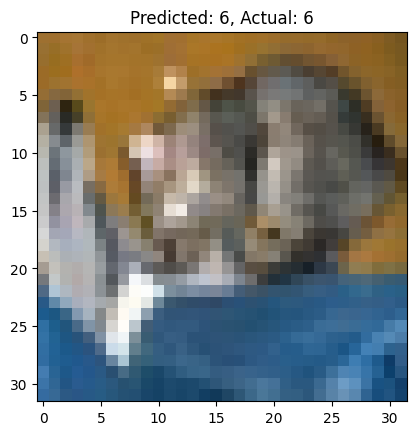

In [12]:
model = CIFAR10CNN().to(device)
model.load_state_dict(torch.load('cifar10_cnn.pth'))

model.eval()

detailer = iter(test_loader)
images, labels = next(detailer)

with torch.no_grad():
    output = model(images.to(device))
    _, predicted = torch.max(output, 1)
    
print('Predicted label for image: ', predicted[5].item())
print('Actual label for image: ', labels[5].item())

img = images[0].cpu().numpy().transpose((1,2,0))
mean = np.array([0.5,0.5,0.5])
std = np.array([0.5,0.5,0.5])
img = std * img + mean
img = np.clip(img, 0, 1)

plt.imshow(img)
plt.title(f"Predicted: {predicted[5].item()}, Actual: {labels[5].item()}")
plt.show()


    